In [31]:
import numpy as np
import matplotlib.pyplot as plt


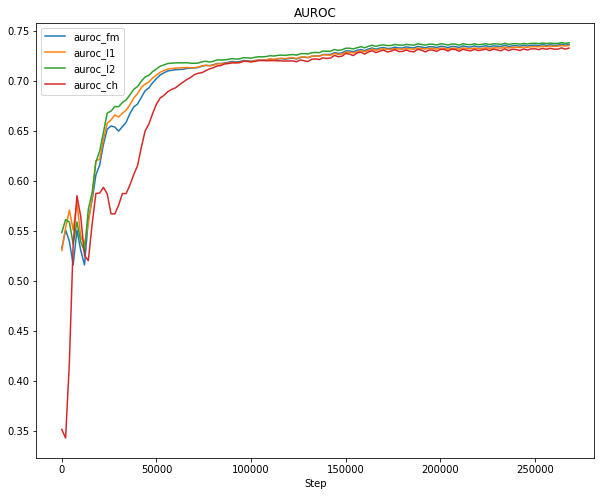

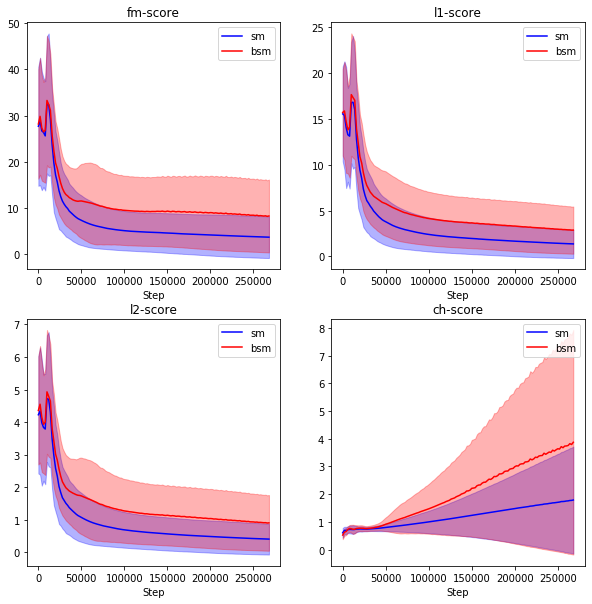

In [33]:
metric_file = '/home/oliverkn/pro/results/4_4/alad/17/metrics.npy'
metrics = np.load(metric_file, allow_pickle=True).item()
metric_names = metrics.keys()

x_axis = metrics['epoch']

# AUROC
auroc_metrics = filter(lambda metric: 'auroc' in metric, metric_names)
fig, ax = plt.subplots(figsize=(10, 8))
for auroc_metric in auroc_metrics:
    ax.plot(x_axis, metrics[auroc_metric], label=auroc_metric)

ax.set_title('AUROC')
ax.set_xlabel('Step')
ax.legend()

# Scores
score_types = ['fm', 'l1', 'l2', 'ch']
fig, ax_arr = plt.subplots(2, 2, figsize=(10, 10))
for i, type in enumerate(score_types):
    if 'sm_mean_' + type not in metric_names: continue

    sm_mean = metrics['sm_mean_' + type]
    bsm_mean = metrics['bsm_mean_' + type]
    sm_std = metrics['sm_std_' + type]
    bsm_std = metrics['bsm_std_' + type]

    ax = ax_arr[int(i / 2), i % 2]

    ax.plot(x_axis, sm_mean, color='b', label='sm')
    ax.plot(x_axis, bsm_mean, color='r', label='bsm')

    ax.fill_between(x_axis, sm_mean - sm_std, sm_mean + sm_std,
                    alpha=0.3, edgecolor='b', facecolor='b')
    ax.fill_between(x_axis, bsm_mean - bsm_std, bsm_mean + bsm_std,
                    alpha=0.3, edgecolor='r', facecolor='r')

    ax.set_title(type + '-score')
    ax.set_xlabel('Step')
    ax.legend()

plt.show()
